In [7]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

num_days = 365
date_rng = pd.date_range(start='2025-01-01', end='2025-12-31', freq='H')

df = pd.DataFrame(date_rng, columns=['timestamp'])

df['day_of_week'] = df['timestamp'].dt.dayofweek
df['hour_of_day'] = df['timestamp'].dt.hour
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

np.random.seed(101)
df['temperature'] = np.where(df['timestamp'].dt.month.isin([12, 1, 2]), 
                             np.random.normal(15, 5, len(df)),  
                             np.random.normal(30, 5, len(df)))  

public_holidays = ['2023-01-26', '2023-08-15', '2023-10-02'] 
df['is_holiday'] = df['timestamp'].dt.date.astype(str).isin(public_holidays).astype(int)

df['solar_generation'] = np.where((df['hour_of_day'] >= 6) & (df['hour_of_day'] <= 18),
                                  np.random.uniform(50, 300, len(df)),  
                                  np.random.uniform(0, 10, len(df))) 

df['electricity_demand'] = (
    500 +  
    df['temperature'] * 2 +  
    df['solar_generation'] * -0.5 +  
    df['is_holiday'] * -100 +  
    np.random.normal(0, 50, len(df))  
)

df['electricity_demand'] += np.where((df['hour_of_day'] >= 18) & (df['hour_of_day'] <= 22), 
                                     100, 0)  

df['electricity_demand'] = df['electricity_demand'].clip(lower=0)

print(df.head())

df.to_csv('dummy_electricity_data.csv', index=False)


            timestamp  day_of_week  hour_of_day  is_weekend  temperature  \
0 2025-01-01 00:00:00            2            0           0    28.534249   
1 2025-01-01 01:00:00            2            1           0    18.140664   
2 2025-01-01 02:00:00            2            2           0    19.539847   
3 2025-01-01 03:00:00            2            3           0    17.519129   
4 2025-01-01 04:00:00            2            4           0    18.255590   

   is_holiday  solar_generation  electricity_demand  
0           0          9.863744          551.973464  
1           0          1.855833          569.099202  
2           0          8.508665          663.336036  
3           0          4.608703          516.206431  
4           0          0.689777          554.241265  


In [8]:
dataset=pd.read_csv('dummy_electricity_data.csv', parse_dates=True)

In [9]:
dataset['timestamp']=pd.to_datetime(dataset['timestamp'])

In [10]:
dataset

,timestamp,day_of_week,hour_of_day,is_weekend,temperature,is_holiday,solar_generation,electricity_demand
0,2025-01-01 00:00:00,2,0,0,28.534249,0,9.863744,551.973464
1,2025-01-01 01:00:00,2,1,0,18.140664,0,1.855833,569.099202
2,2025-01-01 02:00:00,2,2,0,19.539847,0,8.508665,663.336036
3,2025-01-01 03:00:00,2,3,0,17.519129,0,4.608703,516.206431
4,2025-01-01 04:00:00,2,4,0,18.255590,0,0.689777,554.241265
...,...,...,...,...,...,...,...,...
8732,2025-12-30 20:00:00,1,20,0,15.543201,0,4.312377,661.678150
8733,2025-12-30 21:00:00,1,21,0,12.110066,0,6.267570,610.682652
8734,2025-12-30 22:00:00,1,22,0,16.151403,0,9.458964,695.444712
8735,2025-12-30 23:00:00,1,23,0,4.870015,0,2.057425,565.423968


In [11]:
# Function to generate temperature based on the month
def get_temperature_for_month(month):
    if month in [12, 1, 2]:  # Winter
        return np.random.uniform(5, 20)
    elif month in [3, 4]:    # Spring
        return np.random.uniform(15, 30)
    elif month in [5, 6]:    # Summer
        return np.random.uniform(25, 45)
    elif month in [7, 8, 9]: # Monsoon
        return np.random.uniform(20, 35)
    else:                    # Autumn (October and November)
        return np.random.uniform(15, 30)

# Apply temperature generation for each date based on the month
dataset['Temperature'] = dataset['timestamp'].apply(lambda x: get_temperature_for_month(x.month))

# Display the first few rows of the updated dummy data
dataset


,timestamp,day_of_week,hour_of_day,is_weekend,temperature,is_holiday,solar_generation,electricity_demand,Temperature
0,2025-01-01 00:00:00,2,0,0,28.534249,0,9.863744,551.973464,8.864499
1,2025-01-01 01:00:00,2,1,0,18.140664,0,1.855833,569.099202,13.833349
2,2025-01-01 02:00:00,2,2,0,19.539847,0,8.508665,663.336036,11.777216
3,2025-01-01 03:00:00,2,3,0,17.519129,0,4.608703,516.206431,11.039342
4,2025-01-01 04:00:00,2,4,0,18.255590,0,0.689777,554.241265,5.293715
...,...,...,...,...,...,...,...,...,...
8732,2025-12-30 20:00:00,1,20,0,15.543201,0,4.312377,661.678150,19.811739
8733,2025-12-30 21:00:00,1,21,0,12.110066,0,6.267570,610.682652,14.913471
8734,2025-12-30 22:00:00,1,22,0,16.151403,0,9.458964,695.444712,11.230508
8735,2025-12-30 23:00:00,1,23,0,4.870015,0,2.057425,565.423968,16.636109


In [12]:
df.to_csv('2025 testset.csv', index=False)

from IPython.display import FileLink

FileLink('2025 testset.csv')


C:\Users\ASUS\Desktop\Py-DS-ML-Bootcamp-master\Refactored_Py_DS_ML_Bootcamp-master\2025 testset.csv

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

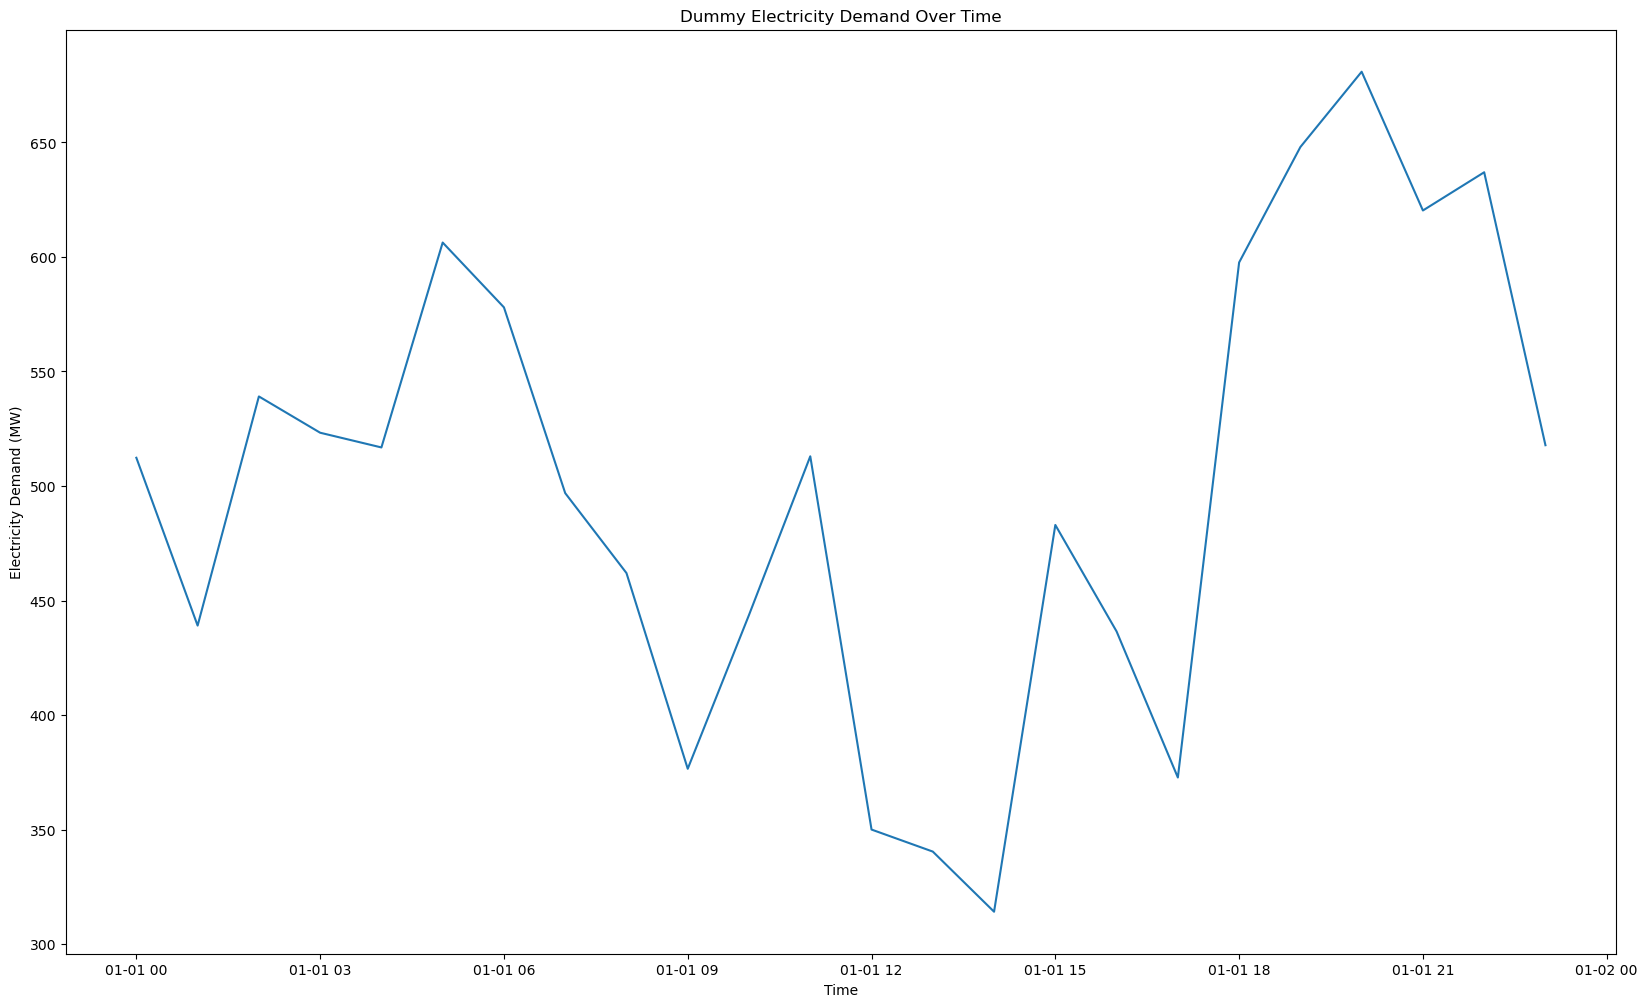

In [36]:
plt.figure(figsize=(20, 12))
plt.plot(df['timestamp'].head(24), df['electricity_demand'].head(24), label='Electricity Demand')
plt.title('Dummy Electricity Demand Over Time')
plt.xlabel('Time')
plt.ylabel('Electricity Demand (MW)')
plt.show()

In [16]:
def assign_compensation_method(row):
    if row['is_holiday'] == 1:
        return 'Lower Power Supply'
    elif row['solar_generation'] > 200:
        return 'Increased Renewable Energy Integration'
    elif row['hour_of_day'] >= 18 and row['hour_of_day'] <= 22:
        return 'Peak Load Shifting'
    elif row['temperature'] > 35:
        return 'Increased Power Supply'
    else:
        return 'Normal Operation'

dataset['compensation_method'] = df.apply(assign_compensation_method, axis=1)

print(dataset[['timestamp', 'electricity_demand', 'compensation_method']].head(20))


              timestamp  electricity_demand  \
0   2000-01-01 00:00:00          512.319382   
1   2000-01-01 01:00:00          439.055673   
2   2000-01-01 02:00:00          539.090652   
3   2000-01-01 03:00:00          523.248968   
4   2000-01-01 04:00:00          516.822822   
5   2000-01-01 05:00:00          606.278463   
6   2000-01-01 06:00:00          577.980704   
7   2000-01-01 07:00:00          496.884904   
8   2000-01-01 08:00:00          461.977229   
9   2000-01-01 09:00:00          376.540583   
10  2000-01-01 10:00:00          443.690675   
11  2000-01-01 11:00:00          512.952432   
12  2000-01-01 12:00:00          350.002758   
13  2000-01-01 13:00:00          340.387439   
14  2000-01-01 14:00:00          314.134954   
15  2000-01-01 15:00:00          482.981777   
16  2000-01-01 16:00:00          436.496677   
17  2000-01-01 17:00:00          372.726301   
18  2000-01-01 18:00:00          597.585748   
19  2000-01-01 19:00:00          647.982649   

            

In [17]:
dataset

,timestamp,day_of_week,hour_of_day,is_weekend,temperature,is_holiday,solar_generation,electricity_demand,compensation_method
0,2000-01-01 00:00:00,5,0,1,17.483571,0,0.853473,512.319382,Normal Operation
1,2000-01-01 01:00:00,5,1,1,14.308678,0,4.869377,439.055673,Normal Operation
2,2000-01-01 02:00:00,5,2,1,18.238443,0,4.997991,539.090652,Normal Operation
3,2000-01-01 03:00:00,5,3,1,22.615149,0,2.738188,523.248968,Normal Operation
4,2000-01-01 04:00:00,5,4,1,13.829233,0,7.694527,516.822822,Normal Operation
...,...,...,...,...,...,...,...,...,...
210356,2023-12-30 20:00:00,5,20,1,10.287488,0,6.321843,614.952598,Peak Load Shifting
210357,2023-12-30 21:00:00,5,21,1,13.728469,0,4.988534,633.911183,Peak Load Shifting
210358,2023-12-30 22:00:00,5,22,1,12.069605,0,7.831031,616.891494,Peak Load Shifting
210359,2023-12-30 23:00:00,5,23,1,15.542929,0,2.843539,497.233142,Normal Operation


Accuracy: 1.00
                                        precision    recall  f1-score   support

                Increased Power Supply       0.99      0.99      0.99      4576
Increased Renewable Energy Integration       1.00      1.00      1.00     13704
                    Lower Power Supply       1.00      0.95      0.97        20
                      Normal Operation       1.00      1.00      1.00     32711
                    Peak Load Shifting       1.00      1.00      1.00     12098

                              accuracy                           1.00     63109
                             macro avg       1.00      0.99      0.99     63109
                          weighted avg       1.00      1.00      1.00     63109

[[ 4551     5     0    20     0]
 [    4 13665     0    34     1]
 [    1     0    19     0     0]
 [   30    10     0 32671     0]
 [    0     4     0     0 12094]]


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

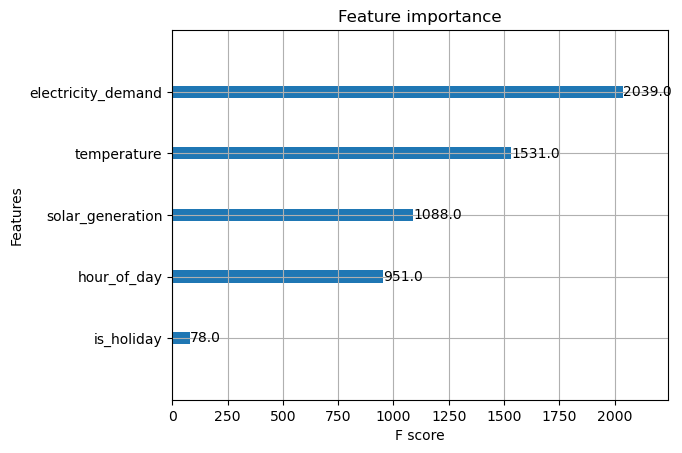

In [18]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder


X = dataset[['temperature', 'solar_generation', 'hour_of_day', 'electricity_demand', 'is_holiday']]

y = dataset['compensation_method']

le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

xgb_clf = xgb.XGBClassifier(objective='multi:softmax', num_class=len(le.classes_), eval_metric='mlogloss', random_state=42)

xgb_clf.fit(X_train, y_train)

y_pred = xgb_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print(classification_report(y_test, y_pred, target_names=le.classes_))
print( confusion_matrix(y_test, y_pred))


xgb.plot_importance(xgb_clf)


Accuracy: 1.00
                                        precision    recall  f1-score   support

                Increased Power Supply       1.00      1.00      1.00      4576
Increased Renewable Energy Integration       1.00      1.00      1.00     13704
                    Lower Power Supply       1.00      0.95      0.97        20
                      Normal Operation       1.00      1.00      1.00     32711
                    Peak Load Shifting       1.00      1.00      1.00     12098

                              accuracy                           1.00     63109
                             macro avg       1.00      0.99      0.99     63109
                          weighted avg       1.00      1.00      1.00     63109

[[ 4576     0     0     0     0]
 [    0 13704     0     0     0]
 [    1     0    19     0     0]
 [    0     0     0 32711     0]
 [    0     0     0     0 12098]]


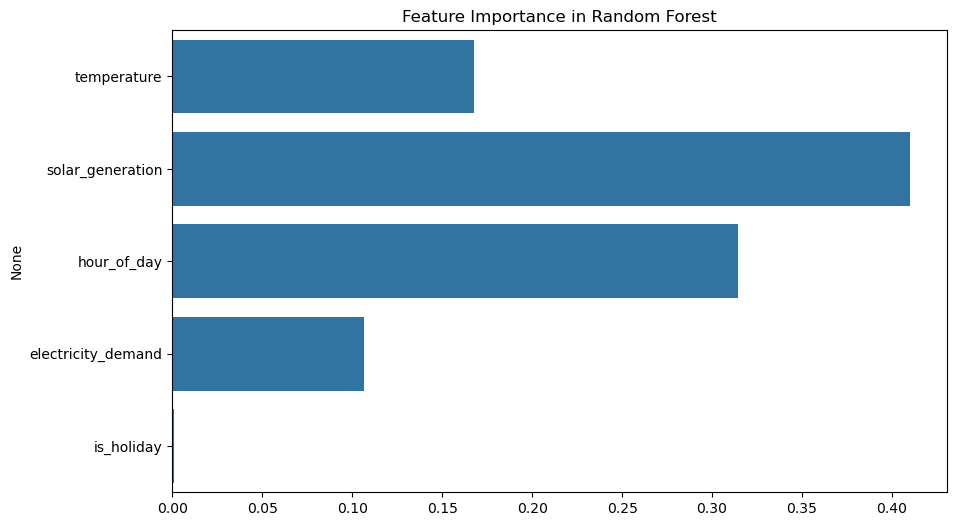

In [19]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


X = dataset[['temperature', 'solar_generation', 'hour_of_day', 'electricity_demand', 'is_holiday']]

y = dataset['compensation_method']

le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print(classification_report(y_test, y_pred, target_names=le.classes_))
print( confusion_matrix(y_test, y_pred))

importances = rf_clf.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title('Feature Importance in Random Forest')
plt.show()
